In [1]:
import gspread
import pandas as pd
from google.oauth2.service_account import Credentials

# === SETUP GOOGLE SHEETS ===
SCOPE = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]

# Inserisci il nome del tuo file JSON con le credenziali
creds = Credentials.from_service_account_file("service_account.json", scopes=SCOPE)
client = gspread.authorize(creds)

# Inserisci l'URL del Google Sheet
SHEET_URL = "https://docs.google.com/spreadsheets/d/1l25oan06keM5VgHU7cpdknOIMk7wzCjWBJ0picuHvmQ/edit#gid=0"

# Apri il foglio
spreadsheet = client.open_by_url(SHEET_URL)
sheet = spreadsheet.get_worksheet(0)  # Prima tab

# Leggi come dataframe
data = sheet.get_all_records(expected_headers=["Timestamp", "Votante", "Titolo idea di merda", "Autore", "Punteggio"])
df = pd.DataFrame(data)

In [2]:
df

,Timestamp,Votante,Titolo idea di merda,Autore,Punteggio
0,2025-07-25 08:18:52,Rick,Buttarsi in acqua per 'accelerare' rientro in ...,Coach,3
1,2025-07-25 08:18:52,Rick,Comprare l’olio che costava di meno (spoiler: ...,Giada,2
2,2025-07-25 08:18:52,Rick,Back and forth Scorzè-Mestre,Cappio,1
3,2025-07-25 08:28:30,Lanny,Back and forth Scorzè-Mestre,Cappio,3
4,2025-07-25 08:28:30,Lanny,Buttarsi in acqua per 'accelerare' rientro in ...,Coach,2
5,2025-07-25 08:28:30,Lanny,Lasciare panino sopra auto,Rick,1
6,2025-07-25 08:29:31,Fra,Buttarsi in acqua per 'accelerare' rientro in ...,Coach,3
7,2025-07-25 08:29:31,Fra,Remare in formazione tricanoistica,Rick,2
8,2025-07-25 08:29:31,Fra,Lasciare panino sopra auto,Rick,1
9,2025-07-25 08:49:36,Andre,Skippare l'elettricità,Tutti,3


In [3]:
# Rinomina le colonne se necessario
df.columns = df.columns.str.strip()

# Raggruppa e somma
df_grouped = df.groupby("Titolo idea di merda", as_index=False)["Punteggio"].sum()

# Ordina per punteggio decrescente
df_grouped = df_grouped.sort_values(by="Punteggio", ascending=False)

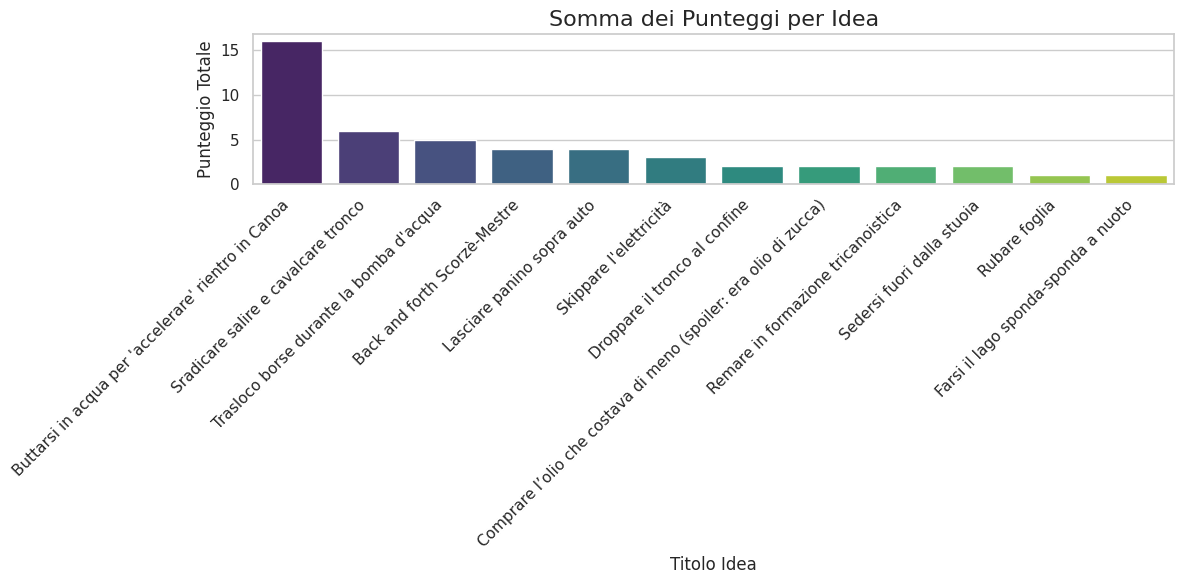

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Imposta lo stile
sns.set_theme(style="whitegrid")

# Crea il plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Titolo idea di merda", 
                 y="Punteggio", 
                 data=df_grouped, 
                 palette="viridis",
                 hue="Titolo idea di merda", 
                 legend=False)

# Etichette
plt.title("Somma dei Punteggi per Idea", fontsize=16)
plt.xlabel("Titolo Idea", fontsize=12)
plt.ylabel("Punteggio Totale", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Mostra
plt.tight_layout()
plt.show()